1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [2]:
### Read in the two datasets:
col_names = ['x', 'y', 'PC1']
df2 = pd.read_csv("PC1_with_X_Y.csv", header=0, names = col_names)
df3 = pd.read_csv("PC1_with_scaled_X_Y.csv", header=0, names = col_names)

In [3]:
#list(df2.columns)
#list(df3.columns)

print(df2.head())
print(df3.head())

        x       y       PC1
0  501460  170580 -0.018991
1  501460  170600 -0.014677
2  501460  170620 -0.010282
3  501460  170640 -0.005910
4  501460  170660 -0.001625
     x         y       PC1
0  0.0  0.356947 -0.018991
1  0.0  0.357339 -0.014677
2  0.0  0.357730 -0.010282
3  0.0  0.358121 -0.005910
4  0.0  0.358513 -0.001625


2. Identify optimum value of epsilon. Start with number dim*2 as the number of neighbours 

In [4]:
neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(df3)
distances, indices = neighbors_fit.kneighbors(df3)

In [5]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

The elbow of the epsilon curve is approx the optimal value for epsilon.

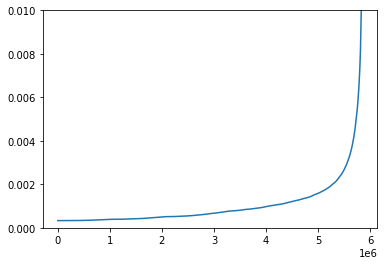

In [6]:
plt.plot(distances)
plt.ylim([0,0.01])
plt.show()

Identify the optimum value of epsilon - the graph shows somewhere around 0.002. Parameter test between 0.001-0.003

In [7]:
### Create numpy array for faster processing of algorithms
X = df3.values
print(X[0:6])

[[ 0.          0.35694716 -0.01899077]
 [ 0.          0.35733855 -0.01467692]
 [ 0.          0.35772994 -0.01028233]
 [ 0.          0.35812133 -0.00591004]
 [ 0.          0.35851272 -0.00162509]
 [ 0.          0.35890411  0.00262247]]


In [8]:
## Created the cluster model using range of epsilon values: 
## use dff for dataframe of values between 0.001 and 0.003
dff = pd.DataFrame()
labels =pd.DataFrame()
n=0
for i in range (10, 30, 2):
    e=i/10000
    dbscan = DBSCAN(min_samples=6, eps=e)
    y_dbscan = dbscan.fit_predict(X)
    dff[i] = y_dbscan
    labels[i] = dbscan.labels_


In [10]:
dff.head()
dfvc = pd.DataFrame()
for i in range (10,30,2):
    e=i/10000
    print(f'value counts for {e}:')
    print(dff[i].value_counts().loc[lambda x : x>10000])
    ## aa =list(dff[i].value_counts().loc[lambda x : x>1]) 
    ## dfvc[i] = aa[0:250]

value counts for 0.001:
-1        3704919
 28427      59338
 27365      38791
 21972      36271
 30485      26478
 28886      24823
 24855      24454
 22762      17317
 11101      16689
 17959      16558
 24712      16308
 6708       15816
 7472       14565
 30471      14199
 3768       14058
 31376      13574
 218        12995
 35149      12866
 1557       12731
 32373      12564
 15223      12227
 18388      12173
 22311      12068
 11769      11913
 26560      11726
 9309       11671
 12917      11114
 17228      11018
 34016      10468
 25663      10392
 972        10366
 31510      10339
Name: 10, dtype: int64
value counts for 0.0012:
-1        3085591
 36179      83795
 39321      41578
 31161      40009
 31795      37050
 35624      36909
 40311      34706
 43536      27671
 14041      27133
 46149      23160
 44064      22983
 8387       22295
 35077      22041
 9851       21123
 4790       20095
 25293      19057
 25825      18777
 20970      16907
 48293      16827
 16106    

In [11]:
dfvc.head(10)


""


Evaluate epsilon values between 0.001 and 0.003

In [13]:
from sklearn import metrics

In [37]:
## Dumpe the labels into numpy for faster processing:
lab = labels.values
print(lab[0:6])

[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


In [15]:
### Test to see how fast D-B will run:
print(f"Davies Bouldin Coefficient for e=0.001: {metrics.davies_bouldin_score(X, lab[ :,1]):.3f}")

MemoryError: Unable to allocate 18.5 GiB for an array with shape (49773, 49773) and data type float64

In [16]:
### Test to see how fast C-H will run:
print(f"Calinski Harabasz Coefficient for e=0.001: {metrics.calinski_harabasz_score(X, lab[ :,1]):.3f}")

Calinski Harabasz Coefficient for e=0.001: 116.848


In [24]:
e = (dff.columns / 10000)
for i in range(0,10):
    print(f"Calinski Harabasz Coefficient for e={e[i]}: {metrics.calinski_harabasz_score(X, lab[ :,i]):.3f}")

Calinski Harabasz Coefficient for e=0.001: 113.320
Calinski Harabasz Coefficient for e=0.0012: 116.848
Calinski Harabasz Coefficient for e=0.0014: 146.617
Calinski Harabasz Coefficient for e=0.0016: 195.550
Calinski Harabasz Coefficient for e=0.0018: 300.873
Calinski Harabasz Coefficient for e=0.002: 463.659
Calinski Harabasz Coefficient for e=0.0022: 607.172
Calinski Harabasz Coefficient for e=0.0024: 563.303
Calinski Harabasz Coefficient for e=0.0026: 477.073


Plot the C-H results for visual 

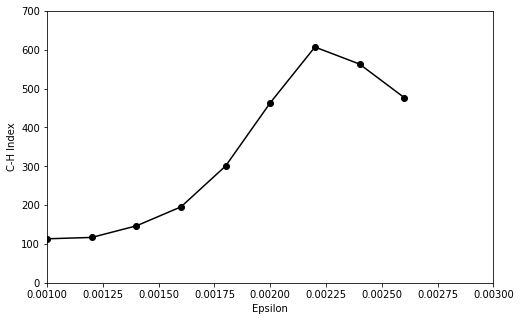

In [28]:
y_ch = [113.320, 116.848, 146.617, 195.550, 300.873, 463.659, 607.172, 563.303, 477.073 ]
e = [0.001, 0.0012, 0.0014, 0.0016, 0.0018, 0.0020, 0.0022, 0.0024, 0.0026 ]
plt.rcParams["figure.figsize"] = (8,5)
plt.xlim(0.0010, 0.0030)
plt.xlabel('Epsilon')
plt.ylim(0,700)
plt.ylabel('C-H Index')
plt.plot(e, y_ch, marker='o', linestyle='-', color='black')
plt.show()


Improve the accuracy of epsilon - analyse between 0.0021 - 0.0023

In [29]:
## Created the cluster model using range of epsilon values: 
## use dfff for dataframe of DBSCAN clusters for values between 0.0023 and 0.0025
dfff = pd.DataFrame()
labels2 =pd.DataFrame()
for i in range (210, 230, 2):
    e=i/100000
    dbscan = DBSCAN(min_samples=6, eps=e)
    y_dbscan = dbscan.fit_predict(X)
    dfff[i] = y_dbscan
    labels2[i] = dbscan.labels_


In [32]:
## Value counts for all the clusters above 1 
# dfff.head()
#dfffvc = pd.DataFrame()
for i in range (210,230,2):
    e=i/10000
    print(f'value counts for {e}:')
    print(dfff[i].value_counts().loc[lambda x : x>10000])
    ## aa =list(dff[i].value_counts().loc[lambda x : x>1]) 
    ## dfvc[i] = aa[0:250]

value counts for 0.021:
-1        1216652
 17269     355538
 24588     206247
 4876      196232
 1058      195189
           ...   
 5305       11376
 4452       11012
 20120      10720
 15972      10473
 19942      10447
Name: 210, Length: 68, dtype: int64
value counts for 0.0212:
-1        1197349
 16860     356455
 4766      316459
 23995     206964
 1035      196190
           ...   
 10179      11482
 4352       11044
 19643      10779
 19481      10483
 10908      10002
Name: 212, Length: 65, dtype: int64
value counts for 0.0214:
-1        1177008
 16455     471407
 4649      323550
 1012      232144
 23362     207748
 111       147285
 3865      143486
 21820     127718
 20846     123093
 22816     123026
 27112     116592
 11596     106925
 49        105380
 8380      104352
 23753      96174
 14002      81461
 36         53580
 26009      52300
 24114      50466
 2138       44036
 4353       40536
 646        39668
 23144      38453
 588        37990
 6595       37890
 269    

In [31]:
dfff.head()

,210,212,214,216,218,220,222,224,226,228
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


Calculate C-H Coefficient for improved epsilon values:

In [36]:
## Dumpe the labels into numpy for faster processing:
lab2 = labels2.values
print(lab2[0:6])

[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


In [38]:
e = (dfff.columns / 10000)
### Note - Epsilon should have been divided by 100,000
for i in range(0,10):
    print(f"Calinski Harabasz Coefficient for e={e[i]}: {metrics.calinski_harabasz_score(X, lab2[ :,i]):.3f}")

Calinski Harabasz Coefficient for e=0.021: 568.584
Calinski Harabasz Coefficient for e=0.0212: 586.365
Calinski Harabasz Coefficient for e=0.0214: 589.789
Calinski Harabasz Coefficient for e=0.0216: 590.480
Calinski Harabasz Coefficient for e=0.0218: 599.762
Calinski Harabasz Coefficient for e=0.022: 607.172
Calinski Harabasz Coefficient for e=0.0222: 614.991
Calinski Harabasz Coefficient for e=0.0224: 630.138
Calinski Harabasz Coefficient for e=0.0226: 635.161
Calinski Harabasz Coefficient for e=0.0228: 637.760


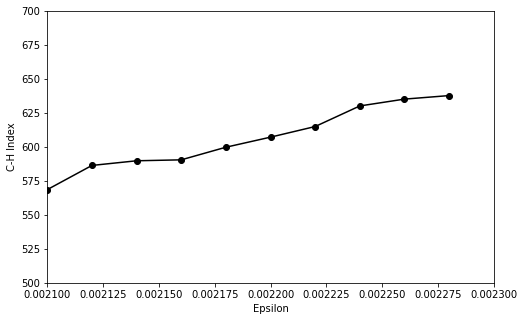

In [41]:
y_ch = [568.584, 586.365, 589.789, 590.480, 599.762, 607.172, 614.991, 630.138, 635.161, 637.760 ]
#e = [0.001, 0.0012, 0.0014, 0.0016, 0.0018, 0.0020, 0.0022, 0.0024, 0.0026 ]
x_ch = e/10
plt.rcParams["figure.figsize"] = (8,5)
plt.xlim(0.0021, 0.0023)
plt.xlabel('Epsilon')
plt.ylim(500,700)
plt.ylabel('C-H Index')
plt.plot(x_ch, y_ch, marker='o', linestyle='-', color='black')
plt.show()

Evaluation: The finer value parameter testing tells us little - we shall stick with the value of 0.0022 from C-H analysis

In [42]:
dfff['x'] = df2['x']
dfff['y'] = df2['y']
dfff.head()

,210,212,214,216,218,220,222,224,226,228,x,y
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,501460,170580
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,501460,170600
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,501460,170620
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,501460,170640
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,501460,170660


### Plotting Heatmaps - visual interpretation of epsilon

<AxesSubplot:xlabel='x', ylabel='y'>

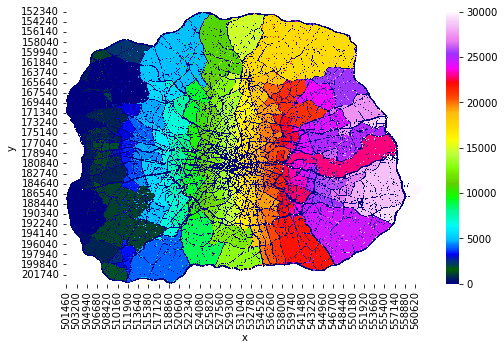

In [47]:
dfffpiv210 = dfff.pivot("y", "x", 210)
sns.heatmap(dfffpiv210, vmin =-1, vmax= 30000, cmap="gist_ncar")

<AxesSubplot:xlabel='x', ylabel='y'>

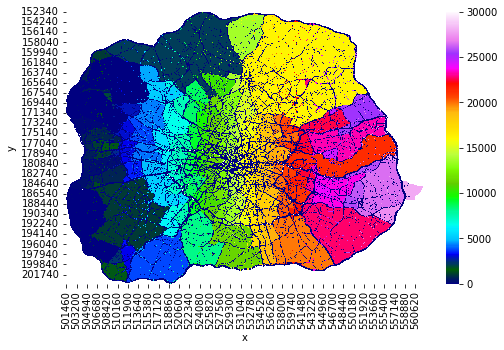

In [48]:
dfffpiv216 = dfff.pivot("y", "x", 216)
sns.heatmap(dfffpiv216, vmin =-1, vmax= 30000, cmap="gist_ncar")

<AxesSubplot:xlabel='x', ylabel='y'>

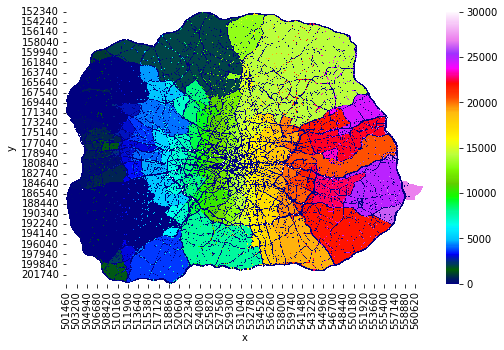

In [49]:
dfffpiv220 = dfff.pivot("y", "x", 220)
sns.heatmap(dfffpiv220, vmin =-1, vmax= 30000, cmap="gist_ncar")

<AxesSubplot:xlabel='x', ylabel='y'>

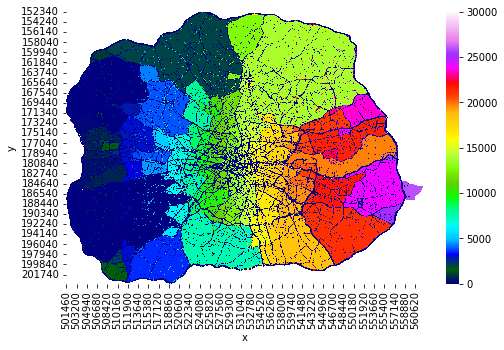

In [50]:
dfffpiv224 = dfff.pivot("y", "x", 224)
sns.heatmap(dfffpiv224, vmin =-1, vmax= 30000, cmap="gist_ncar")

<AxesSubplot:xlabel='x', ylabel='y'>

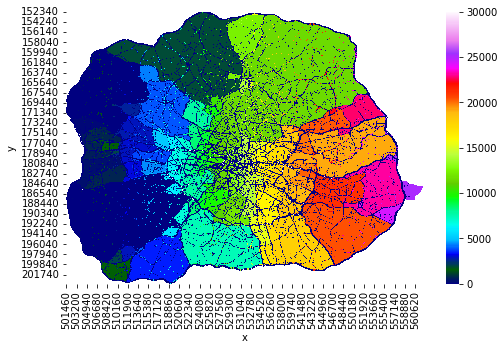

In [51]:
dfffpiv228 = dfff.pivot("y", "x", 228)
sns.heatmap(dfffpiv228, vmin =-1, vmax= 30000, cmap="gist_ncar")

#### Plot the 5 Biggest clusters for epsilon = 0.0022

In [52]:
df2.head()

,x,y,PC1
0,501460,170580,-0.018991
1,501460,170600,-0.014677
2,501460,170620,-0.010282
3,501460,170640,-0.005910
4,501460,170660,-0.001625


In [53]:
### Create df with x-y-PC1-cluster for 220 
df220 = df2
df220['clust'] = dfff[220]
df220.head()

,x,y,PC1,clust
0,501460,170580,-0.018991,-1
1,501460,170600,-0.014677,-1
2,501460,170620,-0.010282,-1
3,501460,170640,-0.005910,-1
4,501460,170660,-0.001625,-1


In [54]:
## List all the clusters with a value above 10,000 for epsilon=0.0022
top_clust22 = dfff[220].value_counts().loc[lambda x : x>10000]
#print(top_clust8)
top_clust22_index = top_clust22.index
print(top_clust22_index[0:15])

Int64Index([   -1, 14252,  2040,    52,  7898, 21896,   105,  3652, 19057,
            20467, 24849, 22292,    38, 13149,  4105],
           dtype='int64')


In [55]:
### Ignore noise for the moment:
data1 = df220[df220['clust']==top_clust22_index[1]]
data2 = df220[df220['clust']==top_clust22_index[2]]
data3 = df220[df220['clust']==top_clust22_index[3]]
data4 = df220[df220['clust']==top_clust22_index[4]]
data5 = df220[df220['clust']==top_clust22_index[5]]

In [56]:
data1.iloc[0]

x        530180.000000
y        171220.000000
PC1           0.124203
clust     14252.000000
Name: 3035529, dtype: float64

In [57]:
x_min = df220['x'].min()
y_min = df220['y'].min()
z_min = df220['PC1'].min()
x_max = df220['x'].max()
y_max = df220['y'].max()
z_max = df220['PC1'].max()

QC the plot cube

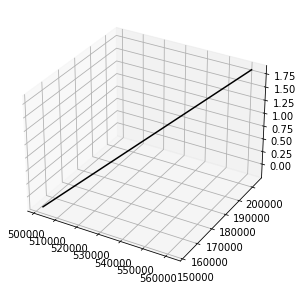

In [58]:
kplot = plt.axes(projection='3d')
xline = np.linspace(x_min, x_max, 10000)
yline = np.linspace(y_min, y_max, 10000)
zline = np.linspace(z_min, z_max, 10000)
kplot.plot3D(xline, yline, zline, 'black')

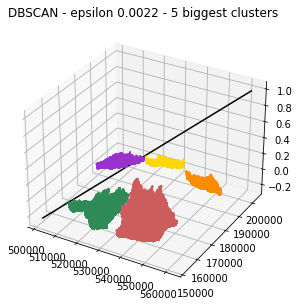

In [65]:
## Set the axes
kplot = plt.axes(projection='3d')
xline = np.linspace(x_min, x_max, 10000)
yline = np.linspace(y_min, y_max, 10000)
zline = np.linspace(z_min, 1, 10000)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.x,data1.y,data1.PC1,c='indianred', label = 'Cluster 1', s=0.1)
kplot.scatter3D(data2.x,data2.y,data2.PC1,c ='seagreen', label = 'Cluster 2', s=0.1)
kplot.scatter3D(data3.x,data3.y,data3.PC1,c ='darkorchid', label = 'Cluster 3', s=0.1)
kplot.scatter3D(data4.x,data4.y,data4.PC1,c ='gold', label = 'Cluster 4', s=0.1)
kplot.scatter3D(data5.x,data5.y,data5.PC1,c ='darkorange', label = 'Cluster 5', s=0.1)
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black', s = 20)
# plt.legend()
plt.title("DBSCAN - epsilon 0.0022 - 5 biggest clusters")
plt.show()

Plotting the 10 biggest clusters: 

In [60]:
## Split data for the next 5 biggest:
data6 = df220[df220['clust']==top_clust22_index[6]]
data7 = df220[df220['clust']==top_clust22_index[7]]
data8 = df220[df220['clust']==top_clust22_index[8]]
data9 = df220[df220['clust']==top_clust22_index[9]]
data10 = df220[df220['clust']==top_clust22_index[10]]

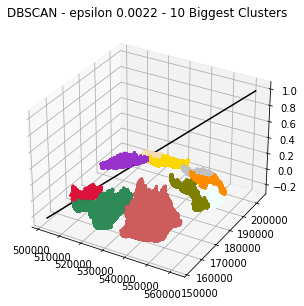

In [62]:
## Set the axes
kplot = plt.axes(projection='3d')
xline = np.linspace(x_min, x_max, 10000)
yline = np.linspace(y_min, y_max, 10000)
zline = np.linspace(z_min, 1, 10000)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.x,data1.y,data1.PC1,c='indianred', label = 'Cluster 1', s=1)
kplot.scatter3D(data2.x,data2.y,data2.PC1,c ='seagreen', label = 'Cluster 2', s=1)
kplot.scatter3D(data3.x,data3.y,data3.PC1,c ='darkorchid', label = 'Cluster 3', s=1)
kplot.scatter3D(data4.x,data4.y,data4.PC1,c ='gold', label = 'Cluster 4', s=1)
kplot.scatter3D(data5.x,data5.y,data5.PC1,c ='darkorange', label = 'Cluster 5', s=1)
kplot.scatter3D(data6.x,data6.y,data6.PC1,c='crimson', label = 'Cluster 6', s=1)
kplot.scatter3D(data7.x,data7.y,data7.PC1,c ='wheat', label = 'Cluster 7', s=1)
kplot.scatter3D(data8.x,data8.y,data8.PC1,c ='silver', label = 'Cluster 8', s=1)
kplot.scatter3D(data9.x,data9.y,data9.PC1,c ='olive', label = 'Cluster 9', s=1)
kplot.scatter3D(data10.x,data10.y,data10.PC1,c ='azure', label = 'Cluster 10', s=1)
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'indigo', s = 200)
#plt.legend()
plt.title("DBSCAN - epsilon 0.0022 - 10 Biggest Clusters")
plt.show()

Plotting the 15 biggest clusters:

In [63]:
## Split data for the next 5 biggest:
data11 = df220[df220['clust']==top_clust22_index[11]]
data12 = df220[df220['clust']==top_clust22_index[12]]
data13 = df220[df220['clust']==top_clust22_index[13]]
data14 = df220[df220['clust']==top_clust22_index[14]]
data15 = df220[df220['clust']==top_clust22_index[15]]

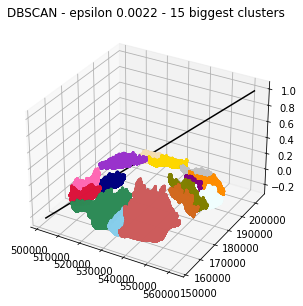

In [64]:
## Set the axes
kplot = plt.axes(projection='3d')
xline = np.linspace(x_min, x_max, 10000)
yline = np.linspace(y_min, y_max, 10000)
zline = np.linspace(z_min, 1, 10000)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.x,data1.y,data1.PC1,c='indianred', label = 'Cluster 1', s=1)
kplot.scatter3D(data2.x,data2.y,data2.PC1,c ='seagreen', label = 'Cluster 2', s=1)
kplot.scatter3D(data3.x,data3.y,data3.PC1,c ='darkorchid', label = 'Cluster 3', s=1)
kplot.scatter3D(data4.x,data4.y,data4.PC1,c ='gold', label = 'Cluster 4', s=1)
kplot.scatter3D(data5.x,data5.y,data5.PC1,c ='darkorange', label = 'Cluster 5', s=1)
kplot.scatter3D(data6.x,data6.y,data6.PC1,c='crimson', label = 'Cluster 6', s=1)
kplot.scatter3D(data7.x,data7.y,data7.PC1,c ='wheat', label = 'Cluster 7', s=1)
kplot.scatter3D(data8.x,data8.y,data8.PC1,c ='silver', label = 'Cluster 8', s=1)
kplot.scatter3D(data9.x,data9.y,data9.PC1,c ='olive', label = 'Cluster 9', s=1)
kplot.scatter3D(data10.x,data10.y,data10.PC1,c ='azure', label = 'Cluster 10', s=1)
kplot.scatter3D(data11.x,data11.y,data11.PC1,c='chocolate', label = 'Cluster 11', s=1)
kplot.scatter3D(data12.x,data12.y,data12.PC1,c ='hotpink', label = 'Cluster 12', s=1)
kplot.scatter3D(data13.x,data13.y,data13.PC1,c ='skyblue', label = 'Cluster 13', s=1)
kplot.scatter3D(data14.x,data14.y,data14.PC1,c ='navy', label = 'Cluster 14', s=1)
kplot.scatter3D(data15.x,data15.y,data15.PC1,c ='purple', label = 'Cluster 15', s=1)
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'indigo', s = 200)
#plt.legend()
plt.title("DBSCAN - epsilon 0.0022 - 15 biggest clusters")
plt.show()

Evaluation - Epsilon value of 0.0022 gives a high number of clusters. The largest clusters are for smaller values away from the centre. Higher values are difficult to cluster and are idenified as noise, giving the larger clusters their boundaries. 

### 2. Parametising min_samples

Identify optimum value for min_samples with epsilon = 0.0022

In [66]:
## Created the cluster model using range of epsilon values: 
## use dfns for dataframe of 
dfns = pd.DataFrame()
labels =pd.DataFrame() 
# i=0
for i in range (2, 20, 2):
    dbscan = DBSCAN(min_samples=i, eps=0.0022)
    y_dbscan = dbscan.fit_predict(X)
    dfns[i] = y_dbscan
    labels[i] = dbscan.labels_
    #print(f"Silhouette Coefficient {i}: {metrics.silhouette_score(X, labels[i]):.3f}")


Evaluation of the models:

In [67]:
for i in range(2,20,2):
    print(f"Calinski Harabasz Coefficient for n={i}: {metrics.calinski_harabasz_score(X, labels[i]):.3f}")

Calinski Harabasz Coefficient for n=2: 93.794
Calinski Harabasz Coefficient for n=4: 314.554
Calinski Harabasz Coefficient for n=6: 607.172
Calinski Harabasz Coefficient for n=8: 741.925
Calinski Harabasz Coefficient for n=10: 736.567
Calinski Harabasz Coefficient for n=12: 746.679
Calinski Harabasz Coefficient for n=14: 804.798
Calinski Harabasz Coefficient for n=16: 860.591
Calinski Harabasz Coefficient for n=18: 922.967


In [68]:
x_ch = [2,4,6,8,10,12,14,16,18]
y_ch = [93.794, 314.554, 607.172, 741.925, 736.567, 746.679, 804.798, 860.591, 922.967  ]
# print(x_ch)


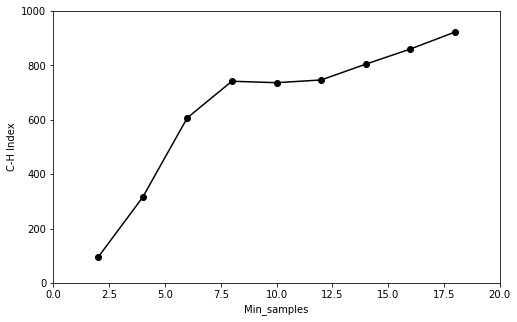

In [69]:
plt.rcParams["figure.figsize"] = (8,5)
plt.xlim(0,20)
plt.xlabel('Min_samples')
plt.ylim(0,1000)
plt.ylabel('C-H Index')
plt.plot(x_ch, y_ch, marker='o', linestyle='-', color='black')
plt.show()

In [102]:
print(f"Davies Bouldin Coefficient for n=8: {metrics.davies_bouldin_score(X, labels[8]):.3f}")

Davies Bouldin Coefficient for n=8: 1.693


In [70]:
#### Counts for min_samples =8 
n_clusters_ = len(set(labels[8])) - (1 if -1 in labels else 0)
n_noise_ = list(labels[8]).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 20495
Estimated number of noise points: 1418693


In [71]:
## list of value counts for cells above 10,000:
for i in range (2,20, 2):
    print(f'value counts for {i}:')
    print(dfns[i].value_counts().loc[lambda x : x>10000])


value counts for 2:
 838       1967619
 321        549338
-1          480322
 116168     277726
 125459     250829
 47409      241139
 124234     218610
 95324      191632
 22258      150221
 331        127298
 86061       88794
 979         84010
 63703       65162
 110033      61637
 58086       38860
 48665       37002
 19977       34933
 3487        34272
 96943       33383
 18151       30239
 154482      19122
 109074      18905
 67338       18789
 17833       16236
 4126        14788
 99211       11265
 41708       10016
Name: 2, dtype: int64
value counts for 4:
 3459     1492069
-1         819604
 57        522845
 181       363883
 34169     272451
 36910     246203
 13456     234783
 36608     216196
 27635     188370
 6193      148479
 61        124673
 214        82035
 24936      77102
 4833       60379
 18206      43917
 32189      42801
 5533       33684
 782        32830
 28112      32260
 16534      29468
 5078       26093
 13829      20405
 45077      18928
 32215     

Lsit of the top clusters

In [73]:
### List all the clusters with a value above 10,000 for min_samples =8
top_clust8 = dfns[8].value_counts().loc[lambda x : x>10000]
#print(top_clust8)
top_clust8_index = top_clust8.index
print(top_clust8_index[0:10])

Int64Index([-1, 11648, 16759, 2619, 15581, 19622, 7209, 28, 9861, 15018], dtype='int64')


DBSCAN - QC for minimum number of samples - plot heatmaps 

In [75]:
dfns['x'] = df2['x']
dfns['y'] = df2['y']
dfns.head()

,2,4,6,8,10,12,14,16,18,x,y
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,501460,170580
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,501460,170600
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,501460,170620
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,501460,170640
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,501460,170660


<AxesSubplot:xlabel='x', ylabel='y'>

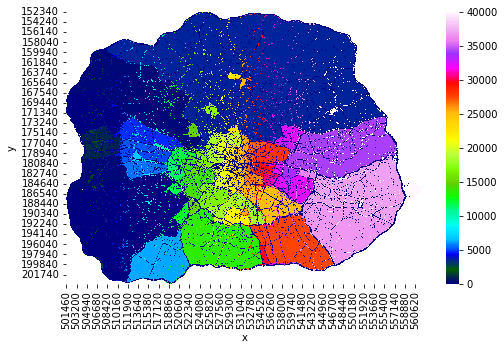

In [79]:
dfnspiv4 = dfns.pivot("y", "x", 4)
sns.heatmap(dfnspiv4, vmin =-1, vmax= 40000, cmap="gist_ncar")

<AxesSubplot:xlabel='x', ylabel='y'>

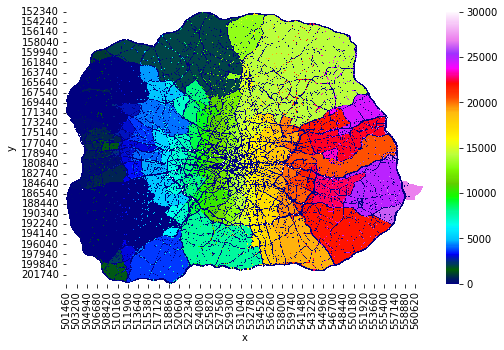

In [82]:
dfnspiv6 = dfns.pivot("y", "x", 6)
sns.heatmap(dfnspiv6, vmin =-1, vmax= 30000, cmap="gist_ncar")

<AxesSubplot:xlabel='x', ylabel='y'>

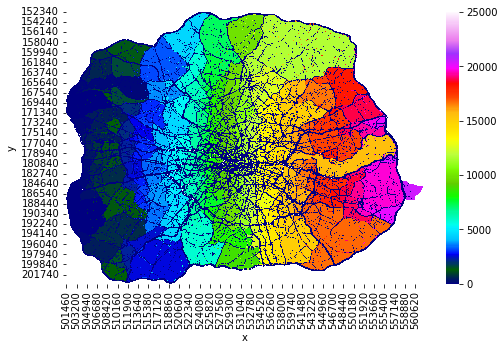

In [83]:
dfnspiv8 = dfns.pivot("y", "x", 8)
sns.heatmap(dfnspiv8, vmin =-1, vmax= 25000, cmap="gist_ncar")

<AxesSubplot:xlabel='x', ylabel='y'>

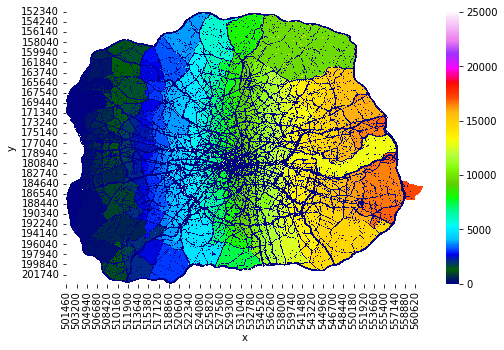

In [84]:
dfnspiv10 = dfns.pivot("y", "x", 10)
sns.heatmap(dfnspiv10, vmin =-1, vmax= 25000, cmap="gist_ncar")

<AxesSubplot:xlabel='x', ylabel='y'>

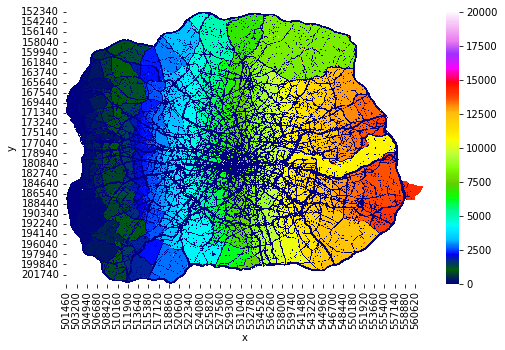

In [85]:
dfnspiv12 = dfns.pivot("y", "x", 12)
sns.heatmap(dfnspiv12, vmin =-1, vmax= 20000, cmap="gist_ncar")

#### Plot the 5 Biggest clusters for epsilon = 0.0022, number of samples = 8

In [86]:
### Create df with x-y-PC1-cluster for 5 samples
df8s = df2
df8s['clust'] = dfns[8]
df8s.head()

,x,y,PC1,clust
0,501460,170580,-0.018991,-1
1,501460,170600,-0.014677,-1
2,501460,170620,-0.010282,-1
3,501460,170640,-0.005910,-1
4,501460,170660,-0.001625,-1


First - analyse the noise for min_sample =8, epsilon = 0.0022

In [87]:
data0 = df8s[df8s['clust']==-1]

In [88]:
x_min = df8s['x'].min()
y_min = df8s['y'].min()
z_min = df8s['PC1'].min()
x_max = df8s['x'].max()
y_max = df8s['y'].max()
z_max = df8s['PC1'].max()

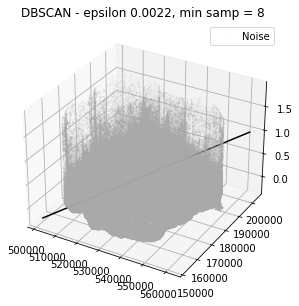

In [90]:
## Set the axes
kplot = plt.axes(projection='3d')
xline = np.linspace(x_min, x_max, 10000)
yline = np.linspace(y_min, y_max, 10000)
zline = np.linspace(z_min, 1, 10000)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data0.x,data0.y,data0.PC1,c='darkgrey', label = 'Noise', s=0.01)
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'indigo', s = 200)
plt.legend()
plt.title("DBSCAN - epsilon 0.0022, min samp = 8")
plt.show()

Plot the noise on a heatmap

<AxesSubplot:xlabel='x', ylabel='y'>

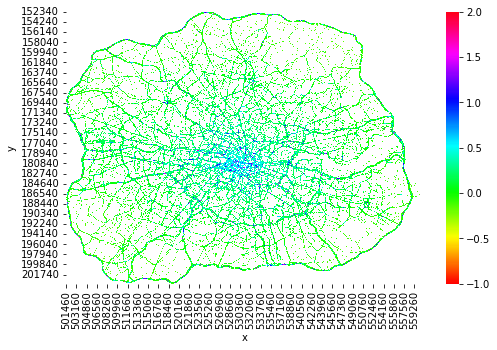

In [91]:
dfns8noisepiv = data0.pivot("y", "x", "PC1")
sns.heatmap(dfns8noisepiv, vmin =-1, vmax= 2, cmap="hsv")

Evaluation: Noise values are high values that are not clustered

Plot the clusters for min_samples =8, epsilon = 0.0022

In [92]:
## Split the data up into clusters, ignore noise
data1 = df8s[df8s['clust']==top_clust8_index[1]]
data2 = df8s[df8s['clust']==top_clust8_index[2]]
data3 = df8s[df8s['clust']==top_clust8_index[3]]
data4 = df8s[df8s['clust']==top_clust8_index[4]]
data5 = df8s[df8s['clust']==top_clust8_index[5]]

In [93]:
x_min = df8s['x'].min()
y_min = df8s['y'].min()
z_min = df8s['PC1'].min()
x_max = df8s['x'].max()
y_max = df8s['y'].max()
z_max = df8s['PC1'].max()

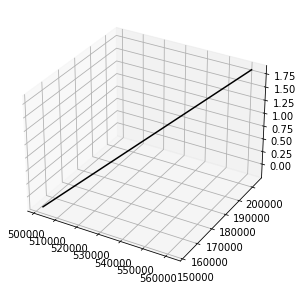

In [94]:
kplot = plt.axes(projection='3d')
xline = np.linspace(x_min, x_max, 10000)
yline = np.linspace(y_min, y_max, 10000)
zline = np.linspace(z_min, z_max, 10000)
kplot.plot3D(xline, yline, zline, 'black')

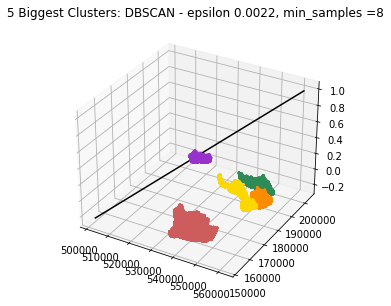

In [95]:
## Set the axes
kplot = plt.axes(projection='3d')
xline = np.linspace(x_min, x_max, 10000)
yline = np.linspace(y_min, y_max, 10000)
zline = np.linspace(z_min, 1, 10000)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.x,data1.y,data1.PC1,c='indianred', label = 'Cluster 1', s=1)
kplot.scatter3D(data2.x,data2.y,data2.PC1,c ='seagreen', label = 'Cluster 2', s=1)
kplot.scatter3D(data3.x,data3.y,data3.PC1,c ='darkorchid', label = 'Cluster 3', s=1)
kplot.scatter3D(data4.x,data4.y,data4.PC1,c ='gold', label = 'Cluster 4', s=1)
kplot.scatter3D(data5.x,data5.y,data5.PC1,c ='darkorange', label = 'Cluster 5', s=1)
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'indigo', s = 200)
# plt.legend()
plt.title("5 Biggest Clusters: DBSCAN - epsilon 0.0022, min_samples =8")
plt.show()

In [96]:
## Split the data up into 5 more clusters
data6 = df8s[df8s['clust']==top_clust8_index[6]]
data7 = df8s[df8s['clust']==top_clust8_index[7]]
data8 = df8s[df8s['clust']==top_clust8_index[8]]
data9 = df8s[df8s['clust']==top_clust8_index[9]]
data10 = df8s[df8s['clust']==top_clust8_index[10]]

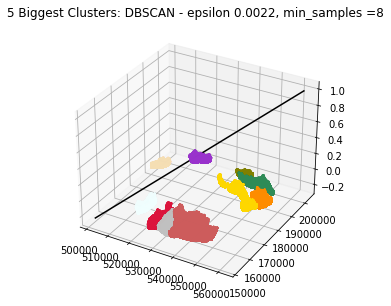

In [98]:
## Set the axes
kplot = plt.axes(projection='3d')
xline = np.linspace(x_min, x_max, 10000)
yline = np.linspace(y_min, y_max, 10000)
zline = np.linspace(z_min, 1, 10000)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.x,data1.y,data1.PC1,c='indianred', label = 'Cluster 1', s=1)
kplot.scatter3D(data2.x,data2.y,data2.PC1,c ='seagreen', label = 'Cluster 2', s=1)
kplot.scatter3D(data3.x,data3.y,data3.PC1,c ='darkorchid', label = 'Cluster 3', s=1)
kplot.scatter3D(data4.x,data4.y,data4.PC1,c ='gold', label = 'Cluster 4', s=1)
kplot.scatter3D(data5.x,data5.y,data5.PC1,c ='darkorange', label = 'Cluster 5', s=1)
kplot.scatter3D(data6.x,data6.y,data6.PC1,c='crimson', label = 'Cluster 6', s=1)
kplot.scatter3D(data7.x,data7.y,data7.PC1,c ='wheat', label = 'Cluster 7', s=1)
kplot.scatter3D(data8.x,data8.y,data8.PC1,c ='silver', label = 'Cluster 8', s=1)
kplot.scatter3D(data9.x,data9.y,data9.PC1,c ='olive', label = 'Cluster 9', s=1)
kplot.scatter3D(data10.x,data10.y,data10.PC1,c ='azure', label = 'Cluster 10', s=1)
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'indigo', s = 200)
#plt.legend()
plt.title("10 Biggest Clusters: DBSCAN - epsilon 0.0022, min_samples =8")
plt.show()

In [99]:
## Split the data up into 5 more clusters
data11 = df8s[df8s['clust']==top_clust8_index[11]]
data12 = df8s[df8s['clust']==top_clust8_index[12]]
data13 = df8s[df8s['clust']==top_clust8_index[13]]
data14 = df8s[df8s['clust']==top_clust8_index[14]]
data15 = df8s[df8s['clust']==top_clust8_index[15]]

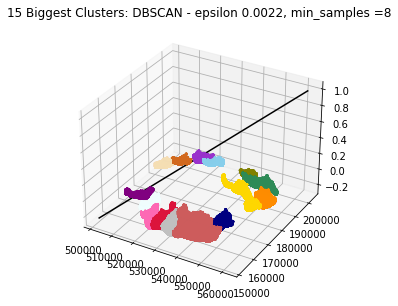

In [101]:
## Set the axes
kplot = plt.axes(projection='3d')
xline = np.linspace(x_min, x_max, 10000)
yline = np.linspace(y_min, y_max, 10000)
zline = np.linspace(z_min, 1, 10000)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.x,data1.y,data1.PC1,c='indianred', label = 'Cluster 1', s=1)
kplot.scatter3D(data2.x,data2.y,data2.PC1,c ='seagreen', label = 'Cluster 2', s=1)
kplot.scatter3D(data3.x,data3.y,data3.PC1,c ='darkorchid', label = 'Cluster 3', s=1)
kplot.scatter3D(data4.x,data4.y,data4.PC1,c ='gold', label = 'Cluster 4', s=1)
kplot.scatter3D(data5.x,data5.y,data5.PC1,c ='darkorange', label = 'Cluster 5', s=1)
kplot.scatter3D(data6.x,data6.y,data6.PC1,c='crimson', label = 'Cluster 6', s=1)
kplot.scatter3D(data7.x,data7.y,data7.PC1,c ='wheat', label = 'Cluster 7', s=1)
kplot.scatter3D(data8.x,data8.y,data8.PC1,c ='silver', label = 'Cluster 8', s=1)
kplot.scatter3D(data9.x,data9.y,data9.PC1,c ='olive', label = 'Cluster 9', s=1)
kplot.scatter3D(data10.x,data10.y,data10.PC1,c ='azure', label = 'Cluster 10', s=1)
kplot.scatter3D(data11.x,data11.y,data11.PC1,c='chocolate', label = 'Cluster 11', s=1)
kplot.scatter3D(data12.x,data12.y,data12.PC1,c ='hotpink', label = 'Cluster 12', s=1)
kplot.scatter3D(data13.x,data13.y,data13.PC1,c ='skyblue', label = 'Cluster 13', s=1)
kplot.scatter3D(data14.x,data14.y,data14.PC1,c ='navy', label = 'Cluster 14', s=1)
kplot.scatter3D(data15.x,data15.y,data15.PC1,c ='purple', label = 'Cluster 15', s=1)
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'indigo', s = 200)
#plt.legend()
plt.title("15 Biggest Clusters: DBSCAN - epsilon 0.0022, min_samples =8")
plt.show()

Evaluation: We see that using min_samples =8, reduces the size of the clusters, and identifies more noise. 